In [1]:
# pip install dataclasses
# from dataclasses import dataclass

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data = load_boston() #import data
X = pd.DataFrame(data["data"], columns=data["feature_names"])  #lay ra features
y = pd.DataFrame(data["target"], columns=["MEDV"])  #lay ra y_true
df = pd.concat([X, y], axis=1)  #ghep X va Y theo chieu ngang
df_train, df_test = train_test_split(df, test_size=0.1, random_state=1) #tach bo du lieu ra thanh tap train va tap test

In [3]:
print(df_train.shape)
df_train.head()

(455, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
242,0.10290,30.0,4.93,0.0,0.428,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22,22.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
168,2.30040,0.0,19.58,0.0,0.605,6.319,96.1,2.1000,5.0,403.0,14.7,297.09,11.10,23.8
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1
62,0.11027,25.0,5.13,0.0,0.453,6.456,67.8,7.2255,8.0,284.0,19.7,396.90,6.73,22.2


## Generate Tree

In [4]:
def sum_squared_error(y_true, y_pred):    #tinh SSE
    if len(y_true) > 0:
        return np.square(y_true - y_pred).sum()   #tra ve tong binh phuong
    else:
        return 0

In [5]:
df_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
242,0.10290,30.0,4.93,0.0,0.428,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22,22.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
168,2.30040,0.0,19.58,0.0,0.605,6.319,96.1,2.1000,5.0,403.0,14.7,297.09,11.10,23.8
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1
62,0.11027,25.0,5.13,0.0,0.453,6.456,67.8,7.2255,8.0,284.0,19.7,396.90,6.73,22.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25,20.9
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37,12.5
235,0.33045,0.0,6.20,0.0,0.507,6.086,61.5,3.6519,8.0,307.0,17.4,376.75,10.88,24.0


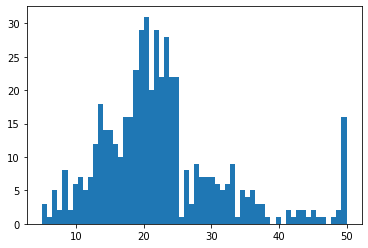

In [6]:
plt.hist(df["MEDV"],60)
plt.show()

In [7]:
for var in df_train.columns[:-1]:
    var_vals = df_train[var].unique()
    thresh = np.sort(var_vals)
    print(thresh.shape)

(453,)
(26,)
(74,)
(2,)
(78,)
(408,)
(331,)
(377,)
(9,)
(64,)
(46,)
(320,)
(409,)


In [8]:
idx = df[var] <= 5.21
df_train.loc[idx, "MEDV"]


5      28.7
233    48.3
179    37.2
232    41.7
370    50.0
       ... 
3      33.4
252    29.6
281    35.4
237    31.5
203    48.5
Name: MEDV, Length: 63, dtype: float64

In [9]:
for var in df_train.columns[:-1]: #lay tung cot của df_train
    var_vals = df_train[var].unique()   #tao ra 1 list de luu tru cac gia tri duy nhat tren tung cot features
    thresh = np.sort(var_vals)    #tao ra list thresh de luu tru list var vals da sap xep tu nho den lon
#     breakpoint()
#     pdb.set_trace()
    sse = np.zeros_like(thresh)  #tao ra list 0 sse co kich thuoc bang list thresh 
    for i, t in enumerate(thresh): #lay index i va gia tri t trong list thresh
        idx = df[var] <= t   #so sanh tung gia tri cua feature voi t tuong ung
        l_val = df_train.loc[idx, "MEDV"].mean() #tinh trung binh cong tai cac gia tri True trong idx
        sse_l = sum_squared_error(df_train.loc[idx, "MEDV"], l_val)  #tinh sse giua cac gia tri <=t voi l_val
        r_val = df_train.loc[~idx, "MEDV"].mean() #tinh trung binh cong tai cac gia tri False trong idx
        sse_r = sum_squared_error(df_train.loc[~idx, "MEDV"], r_val) #tinh sse giua cac gia tri >t voi l_val
        sse[i] = sse_l + sse_r   #tinh sse tai tung gia tri unique
    idx = sse.argmin()   #tao list gom cac index cua gia tri nho nhat theo tung cot (1 giá trị)
    pdb.set_trace()
    #thresh[idx], sse.min(), l_val[idx], r_val[idx]
    plt.plot(thresh, sse)
    plt.plot
    plt.yscale("log")
    plt.title(var)
    plt.show()

> <ipython-input-9-2b6d998217c0>(17)<module>()
     15     pdb.set_trace()
     16     #thresh[idx], sse.min(), l_val[idx], r_val[idx]
---> 17     plt.plot(thresh, sse)
     18     plt.plot
     19     plt.yscale("log")

ipdb> exit


BdbQuit: 

In [10]:
var_vals = df_train[df_train.columns[0]].unique()
print(df_train.columns[0])
print(df_train[df_train.columns[0]])
thresh = np.sort(var_vals)
sse = np.zeros_like(thresh)
l_val = np.zeros_like(thresh)
r_val = np.zeros_like(thresh)
for i, t in enumerate(thresh):
    idx = df[var] <= t
    l_val[i] = df.loc[idx, df_train.columns[-1]].mean()
    sse_l = sum_squared_error(df.loc[idx, df_train.columns[-1]], l_val[i])
    r_val[i] = df.loc[~idx, df_train.columns[-1]].mean()
    sse_r = sum_squared_error(df.loc[~idx, df_train.columns[-1]], r_val[i])
    sse[i] = sse_l + sse_r
# pdb.set_trace()
idx = sse.argmin()   #tao list gom cac index cua gia tri nho nhat theo tung cot (1 giá trị)
print(thresh[idx], sse.min(), l_val[idx], r_val[idx])

CRIM
242    0.10290
5      0.02985
168    2.30040
490    0.20746
62     0.11027
        ...   
255    0.03548
72     0.09164
396    5.87205
235    0.33045
37     0.08014
Name: CRIM, Length: 455, dtype: float64
6.65492 34450.1226854067 24.38732057416272 13.723863636363637


In [11]:
def get_thresh_per_var(df, var, y_col): #co tac dung tinh sse nhu tren nhung viet thanh ham
    var_vals = df[var].unique()
    thresh = np.sort(var_vals)
    sse = np.zeros_like(thresh)
    l_val = np.zeros_like(thresh)
    r_val = np.zeros_like(thresh)
    for i, t in enumerate(thresh):
        idx = df[var] <= t
        l_val[i] = df.loc[idx, y_col].mean()
        sse_l = sum_squared_error(df.loc[idx, y_col], l_val[i])
        r_val[i] = df.loc[~idx, y_col].mean()
        sse_r = sum_squared_error(df.loc[~idx, y_col], r_val[i])
        sse[i] = sse_l + sse_r
#     pdb.set_trace()
    idx = sse.argmin()   #tao list gom cac index cua gia tri nho nhat theo tung cot (1 giá trị)
    return thresh[idx], sse.min(), l_val[idx], r_val[idx] #tra ve: giá trị nhỏ nhất nho nhat cua thresh, gia tri sse nho nhat,
                                                                            #giá trị nhỏ nhất của l_val, r_val

def get_thresh(df, y_col):
    best_sse = float("inf")   #khoi tao best sse la duong vo cung
    for col in df.columns:   #lay tung cot trong dataframe
        if col == y_col:   #neu lay nham cot y_col thi bo qua 
            continue
        t, sse, l_val, r_val = get_thresh_per_var(df, col, y_col)  #chay ham get_thresh_per_var va tra ve 4 gtri qua ham
        if sse < best_sse:      #neu sse nhan duoc nho hon best_sse thi gan cac gia tri best bang gia tri co sse nho hon
            best_sse = sse
            best_col = col
            best_thresh = t
            best_l_val = l_val
            best_r_val = r_val
            
    return best_col, best_thresh, best_l_val, best_r_val   #tra ve cac gia tri best

class Node:    #khoi tao 1 Node co 3 phan ben trong tuong tu struct cua C
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

def splitting(df, y_col, depth=1):  #khởi tạo giá trị mặc định hiện tại depth = 1
    if len(df) < LEAF_THRESH or depth > DEPTH_THRESH:
        return None     #neu df co do dai nho hon so leaf??? hoac do dai dang xet lon hon do dai cho phep thi dung (điều kiện dừng đệ quy)
    print(df.shape, depth)  #in ra kích thước dataframe và độ sâu hiện tại
    best_col, thresh, l_val, r_val = get_thresh(df, y_col) 

    node = Node((best_col, thresh, l_val, r_val))   #khoi tao Node lưu trữ tuple gom best_col, thresh, l_val, r_val

    idx = df[best_col] <= thresh
    node.left = splitting(df[idx], y_col, depth+1)
    node.right = splitting(df[~idx], y_col, depth+1)
    
    return node

In [24]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [21]:
LEAF_THRESH = 20
DEPTH_THRESH = 3
tree = splitting(df_train, "MEDV")

(455, 14) 1
(191, 14) 2
(165, 14) 3
(26, 14) 3
(264, 14) 2
(136, 14) 3
(128, 14) 3


In [20]:
def print_tree(tree, tab=""):     #moi lan goi de quy la lui 1 tab
    print(tab + str(tree.val))  #duyet kieu PreOrder
    if tree.left:   #neu tree.left khac None
        print_tree(tree.left, tab+"\t")
    if tree.right:   ##neu tree.right khac None
        print_tree(tree.right, tab+"\t")
        
print_tree(tree)    

('LSTAT', 9.71, 29.738743455497364, 17.354545454545462)
	('RM', 7.42, 27.395757575757568, 44.607692307692304)
		('DIS', 1.3567, 50.0, 26.689374999999984)
			('RM', 6.635, 23.654081632653064, 31.487096774193553)
		('CRIM', 2.01019, 45.516000000000005, 21.9)
			('PTRATIO', 14.9, 48.03846153846154, 42.78333333333333)
	('LSTAT', 16.03, 20.222794117647062, 14.307031249999996)
		('B', 100.63, 13.25, 20.54461538461539)
			('INDUS', 3.97, 25.1625, 20.24180327868853)
		('NOX', 0.597, 17.829545454545457, 12.461904761904758)
			('PTRATIO', 20.9, 18.797142857142855, 14.066666666666668)
			('CRIM', 9.82349, 14.380392156862746, 9.496969696969696)


In [14]:
def predict(row, tree=tree):    #dua du lieu vao theo cot
    col, thresh, l_val, r_val = tree.val  #van la duyet theo kieu PreOder
    if row[col] <= thresh:      #tai row[col] neu <= thresh thi re nhanh
        ans = l_val
        if tree.left:           #neu tree.left khac None thi de quy tiep khong thi dung lai
            return predict(row, tree.left)
        else:
            return ans
    else:
        ans = r_val        #tuong tu nhu vay voi tree.right
        if tree.right:
            return predict(row, tree.right)
        else:
            return ans

In [15]:
from sklearn.metrics import mean_squared_error

In [25]:
y_pred = df_test.apply(predict, axis=1) #apply ham predict theo tung hang cua df_test
# print(df_test)
print(y_pred)
mean_squared_error(y_pred, df_test["MEDV"])  #tinh mse cua model hien tai

307    26.689375
343    26.689375
47     17.829545
67     26.689375
362    20.544615
132    20.544615
292    26.689375
31     20.544615
218    17.829545
90     26.689375
481    26.689375
344    26.689375
119    20.544615
66     20.544615
312    20.544615
407    20.544615
376    12.461905
225    45.516000
201    26.689375
147    12.461905
315    20.544615
146    12.461905
314    26.689375
324    26.689375
65     26.689375
425    12.461905
34     17.829545
345    20.544615
261    45.516000
389    12.461905
351    26.689375
245    17.829545
204    45.516000
447    12.461905
330    26.689375
494    20.544615
446    12.461905
4      26.689375
406    12.461905
486    20.544615
329    26.689375
334    26.689375
223    26.689375
475    17.829545
478    12.461905
419    12.461905
162    45.516000
394    12.461905
165    20.544615
102    13.250000
473    20.544615
dtype: float64


15.301130071406932

In [17]:
mean_squared_error(df_test["MEDV"], df_train["MEDV"].mean()*np.ones_like(df_test["MEDV"])) #tinh mse cua bad model

92.84966098534088

In [18]:
1 - mean_squared_error(y_pred, df_test["MEDV"]) / mean_squared_error(df_test["MEDV"], df_train["MEDV"].mean()*np.ones_like(df_test["MEDV"]))
#tinh r2

0.835205321063879